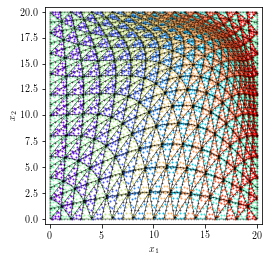

In [1]:
# GHOST - Euler Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 3

# geometry mapping degree (isoparametric)
p_geo = p

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_L20_x_21y_21.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,20.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,20.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2, L=20.0), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p+1

# solver parameters
params = {"project_title": "euler_p3c0t2",
         "problem": "compressible_euler",
         "specific_heat_ratio": 1.4,
         "numerical_flux": "roe",
         "initial_condition": "isentropic_vortex",
         "initial_vortex_centre": np.array([10.0,10.0]),
         "background_temperature": 1.0,
         "background_velocity": np.array([1.0,1.0]),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu,
         "facet_rule": "lg",
         "solution_representation": "nodal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 20.0,
         "time_step_scale": 0.0025}

# set up solver
solver = Solver(params,mesh)
weak = Solver(params,mesh)
params_strong = params.copy()
params_strong["form"] = "strong"
strong = Solver(params_strong,mesh)
strong.discretization.plot(plot_geometry_nodes=False, markersize=1.0, filename="../plots/euler_t1.pdf")